In [1]:
import numpy as np
import pandas as pd
import os
import csv
from datetime import datetime
import json
import matplotlib.pyplot as plt

In [2]:
quals = pd.read_csv('./kaggle_csvs/qualifying.csv')
drivers = pd.read_csv('./kaggle_csvs/drivers.csv')
races = pd.read_csv('./kaggle_csvs/races.csv')
races = races.sort_values(by=['date'])
results = pd.read_csv('./kaggle_csvs/results.csv')
status = pd.read_csv('./kaggle_csvs/status.csv')

In [3]:
elo = {}
n_races = {}
for d in drivers['driverId']:
    elo[d] = [1300]
    n_races[d] = 0

In [4]:
for i,r in races.iterrows():
    if r['year'] > 2018:
        continue
    ds = []
    el = []
    race = results[results['raceId'] == r['raceId']]
    race = race.reset_index(drop=True)
    for ind,d in race.iterrows():
        d1 = d['driverId']
        for c in range(ind+1,len(race.index)):
            comp = race.iloc[c]
            d2 = comp['driverId']
            if n_races[d1] < 200:
                qr1 = 24-8/200*n_races[d1]
                rr1 = 24-12/200*n_races[d1]
            else:
                qr1 = 16
                rr1 = 12
            if n_races[d2] < 200:
                qr2 = 24-8/200*n_races[d2]
                rr2 = 24-12/200*n_races[d2]
            else:
                qr2 = 16
                rr2 = 12
            qr1 = 16
            rr1 = 12
            qr2 = 16
            rr2 = 12
            
            
            if d['grid'] != r'\N' and comp['grid'] != r'\N':
                ev = 1/(1+10**((elo[d2][-1]-elo[d1][-1])/400))
                elo[d1] = elo[d1] + [elo[d1][-1] + qr1*(int(d['grid']<comp['grid'])-ev)]
                elo[d2] = elo[d2] + [elo[d2][-1] + qr2*(int(d['grid']>comp['grid'])-(1-ev))]
            if d['position'] != r'\N' and comp['position'] != r'\N':
                ev = 1/(1+10**((elo[d2][-1]-elo[d1][-1])/400))
                elo[d1] = elo[d1] + [elo[d1][-1] + rr1*(int(d['position']<comp['position'])-ev)]
                elo[d2] = elo[d2] + [elo[d2][-1] + rr2*(int(d['position']>comp['position'])-(1-ev))]
        n_races[d1] = n_races[d1] + 1
        ds.append(d1)
        el.append(elo[d1][-1])
    m = np.mean(el)
    sd = np.std(el)
    #"""
    if sd == 0:
        continue
    for d in range(len(el)):
        elo[ds[d]][-1] = 1500 + (el[d] - m)*400/sd
    #"""

In [5]:
tto = ['hamilton','bottas','max_verstappen','perez','norris','ricciardo','leclerc','sainz','ocon','alonso','stroll','vettel','gasly','tsunoda','russell','latifi','giovinazzi','raikkonen','mazepin','mick_schumacher']
tet = ['hamilton','bottas','max_verstappen','perez','ocon','ricciardo','leclerc','sainz','vandoorne','vettel','gasly','ericsson','stroll','raikkonen','hartley','sirotkin','hulkenberg','magnussen','grosjean']
print(sd)
print(m)
print(el)
for i in drivers['driverId']:
    name = drivers[drivers['driverId']==i]['driverRef'].item()
    if name == 'ocon':
        print(name)
        print(max(elo[i]))
    if name in tet:
        print(name)
        print(elo[i][-1])
    #print(n_races[i])
    #print(elo[i][-1])
    #name = drivers[drivers['driverId']==i]['driverRef'].item()

402.32617652258136
1500.0
[3193.339207082315, 1587.4305891677523, 1534.3530754983658, 1488.1599379603301, 1569.2525296321494, 1390.7486520625478, 1408.9488931318983, 1353.948455654046, 1391.5355592212325, 1393.123906960418, 1343.9767818752757, 1354.913295303321, 1237.3112276568693, 1240.0162568254186, 1266.8052931451766, 1352.0337622867553, 1430.0375357126752, 1416.881760835866, 1624.2001719047116, 1422.983108082875]
hamilton
3183.5486288447087
raikkonen
1623.4820691790017
vettel
1586.9250814584718
magnussen
1083.0129842170595
grosjean
1392.16268082156
gasly
1352.8892760673357
hartley
1676.698968341749
hulkenberg
1423.4284056952956
perez
1354.7928990270345
ricciardo
1488.228395038069
bottas
1568.8521241453575
ericsson
1417.3623353244889
max_verstappen
1534.154452285744
sainz
1391.3803234164454
vandoorne
1241.5194353778377
ocon
1591.5891410887114
ocon
1430.4420459120706
stroll
1238.8300461942358
leclerc
1409.475334013728
sirotkin
1268.1535823789632


In [6]:
tto = ['hamilton','bottas','max_verstappen','perez','norris','ricciardo','leclerc','sainz','ocon','alonso','stroll','vettel','gasly','tsunoda','russell','latifi','giovinazzi','raikkonen','mazepin','mick_schumacher']
tet = ['hamilton','bottas','max_verstappen','perez','ocon','ricciardo','leclerc','sainz','vandoorne','vettel','gasly','ericsson','stroll','raikkonen','hartley','sirotkin','hulkenberg','magnussen','grosjean']
print(sd)
print(m)
print(el)
for i in drivers['driverId']:
    name = drivers[drivers['driverId']==i]['driverRef'].item()
    if name == 'ocon':
        print(name)
        print(max(elo[i]))
    if name in tet:
        print(name)
        print(elo[i][-1])
    #print(n_races[i])
    #print(elo[i][-1])
    #name = drivers[drivers['driverId']==i]['driverRef'].item()

402.32617652258136
1500.0
[3193.339207082315, 1587.4305891677523, 1534.3530754983658, 1488.1599379603301, 1569.2525296321494, 1390.7486520625478, 1408.9488931318983, 1353.948455654046, 1391.5355592212325, 1393.123906960418, 1343.9767818752757, 1354.913295303321, 1237.3112276568693, 1240.0162568254186, 1266.8052931451766, 1352.0337622867553, 1430.0375357126752, 1416.881760835866, 1624.2001719047116, 1422.983108082875]
hamilton
3183.5486288447087
raikkonen
1623.4820691790017
vettel
1586.9250814584718
magnussen
1083.0129842170595
grosjean
1392.16268082156
gasly
1352.8892760673357
hartley
1676.698968341749
hulkenberg
1423.4284056952956
perez
1354.7928990270345
ricciardo
1488.228395038069
bottas
1568.8521241453575
ericsson
1417.3623353244889
max_verstappen
1534.154452285744
sainz
1391.3803234164454
vandoorne
1241.5194353778377
ocon
1591.5891410887114
ocon
1430.4420459120706
stroll
1238.8300461942358
leclerc
1409.475334013728
sirotkin
1268.1535823789632


In [7]:
print(max(elo[1]))

3196.7857524454294


In [8]:
print(max(elo[830]))

1804.1822066151553


In [9]:
x = [elo[i][-1] for i in elo.keys()]
m = min(x)
print(m)
print(x.index(m))
print(drivers[drivers['driverId'] == 224])
print(elo[224])

-76.54265620626643
223
     driverId           driverRef number code forename     surname  \
223       224  emerson_fittipaldi     \N   \N  Emerson  Fittipaldi   

            dob nationality                                              url  
223  1946-12-12   Brazilian  http://en.wikipedia.org/wiki/Emerson_Fittipaldi  
[1300, 1299.9435105723267, 1299.9011709492147, 1298.5354573989428, 1297.5258070313168, 1296.6435061471268, 1295.9881029181859, 1290.9649965293054, 1287.3455038684497, 1287.300169635361, 1287.2661866516326, 1289.9755313077344, 1279.955431064626, 1271.4244056054051, 1265.3202116832647, 1255.7439259788628, 1260.8827862876626, 1272.3605229001962, 1265.1658664269542, 1259.0533053503555, 1250.3318112169736, 1250.3126431630594, 1241.2778506054642, 1231.7448676417055, 1229.2950523125726, 1222.2071859741461, 1213.425381913109, 1205.677028650819, 1196.6997137880878, 1196.3598666428934, 1189.4323065675883, 1189.4136470406754, 1189.3996553980728, 1189.2102991849113, 1189.0685876392

(array([  1.,   0.,  39., 338., 360.,  79.,  22.,   5.,   2.,   7.]),
 array([ -76.54265621,  263.18082942,  602.90431505,  942.62780067,
        1282.3512863 , 1622.07477193, 1961.79825755, 2301.52174318,
        2641.24522881, 2980.96871443, 3320.69220006]),
 <BarContainer object of 10 artists>)

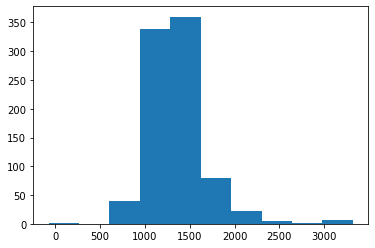

In [10]:
plt.hist(x)